# Python animation

## Setup

### Define shape

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define original shape (triangle)
original_shape = np.array([
    [0, 0],
    [1, 0],
    [0.5, 1],
    [0, 0]  # Close the triangle
]).T  # Shape is 2xN

## Define helper for transformations

In [2]:
def get_transformation_matrix(
    scale: float,
    angle: float,
    tx: float,
    ty: float,
):
    '''Creates the transformation matrix for scaling, rotation, and translation.'''

    S = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]
    ])
    R = np.array([
        [np.cos(angle), -np.sin(angle), 0],
        [np.sin(angle), np.cos(angle), 0],
        [0, 0, 1]
    ])
    T = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    return T @ R @ S

## Define animation parameters

In [3]:
num_frames = 60
angles = np.linspace(0, 2 * np.pi, num_frames)
scales = np.linspace(1, 2, num_frames)
translations = np.linspace(0, 5, num_frames)

## Animation

## Animation loop


Transformation matrix for frame 1:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 1:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 1:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
--------------------------------------------------


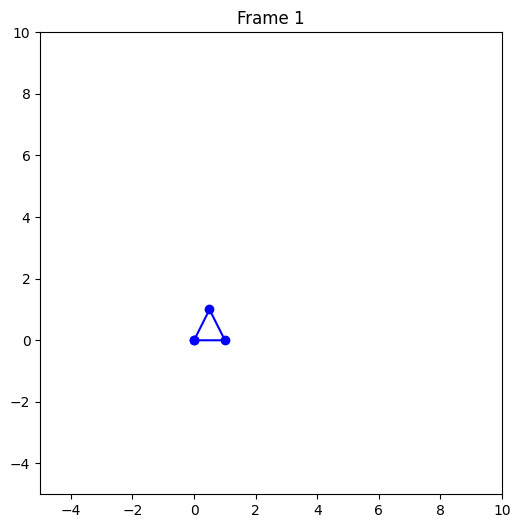

Transformation matrix for frame 11:
[[ 0.56667814 -1.02302801  0.84745763]
 [ 1.02302801  0.56667814  0.84745763]
 [ 0.          0.          1.        ]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 11:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 11:
[[0.84745763 1.41413576 0.10776868 0.84745763]
 [0.84745763 1.87048564 1.92564977 0.84745763]
 [1.         1.         1.         1.        ]]
--------------------------------------------------


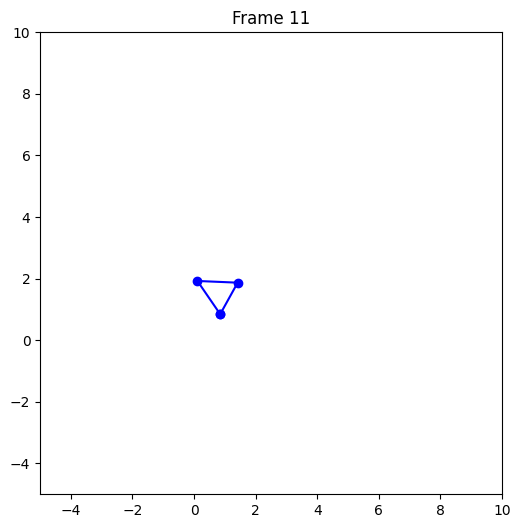

Transformation matrix for frame 21:
[[-0.71022461 -1.13510203  1.69491525]
 [ 1.13510203 -0.71022461  1.69491525]
 [ 0.          0.          1.        ]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 21:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 21:
[[1.69491525 0.98469065 0.20470092 1.69491525]
 [1.69491525 2.83001728 1.55224166 1.69491525]
 [1.         1.         1.         1.        ]]
--------------------------------------------------


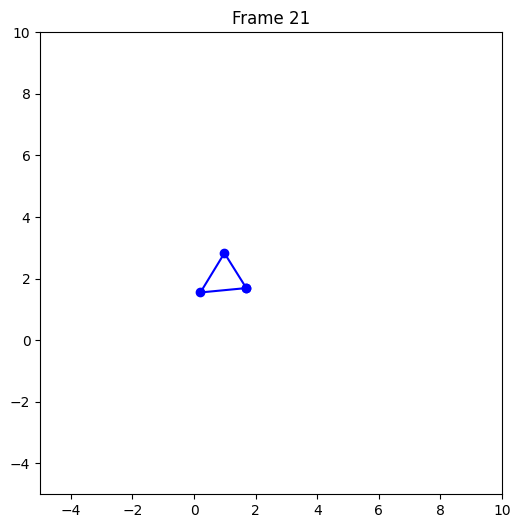

Transformation matrix for frame 31:
[[-1.50633661  0.0802843   2.54237288]
 [-0.0802843  -1.50633661  2.54237288]
 [ 0.          0.          1.        ]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 31:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 31:
[[2.54237288 1.03603627 1.86948887 2.54237288]
 [2.54237288 2.46208858 0.99589412 2.54237288]
 [1.         1.         1.         1.        ]]
--------------------------------------------------


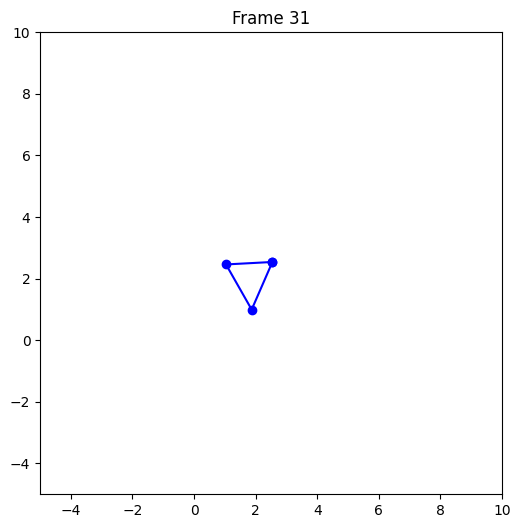

Transformation matrix for frame 41:
[[-0.73378686  1.50901527  3.38983051]
 [-1.50901527 -0.73378686  3.38983051]
 [ 0.          0.          1.        ]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 41:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 41:
[[3.38983051 2.65604365 4.53195235 3.38983051]
 [3.38983051 1.88081524 1.90153601 3.38983051]
 [1.         1.         1.         1.        ]]
--------------------------------------------------


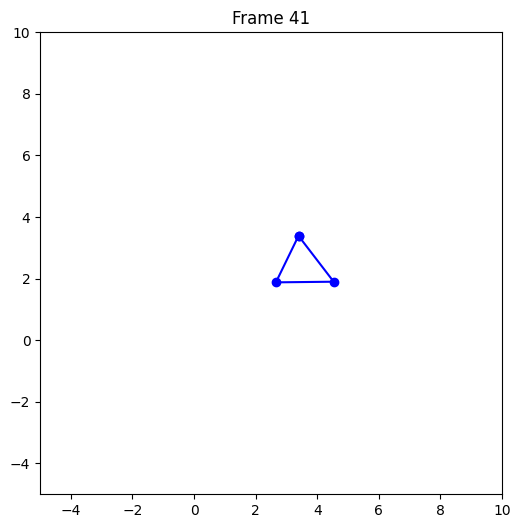

Transformation matrix for frame 51:
[[ 1.06189538  1.5117797   4.23728814]
 [-1.5117797   1.06189538  4.23728814]
 [ 0.          0.          1.        ]]
Ones vector for homogeneous coordinates:
[[1. 1. 1. 1.]]
Shape coordinates (homogeneous) for frame 51:
[[0.  1.  0.5 0. ]
 [0.  0.  1.  0. ]
 [1.  1.  1.  1. ]]
Transformed shape coordinates (homogeneous) for frame 51:
[[4.23728814 5.29918352 6.28001553 4.23728814]
 [4.23728814 2.72550843 4.54329367 4.23728814]
 [1.         1.         1.         1.        ]]
--------------------------------------------------


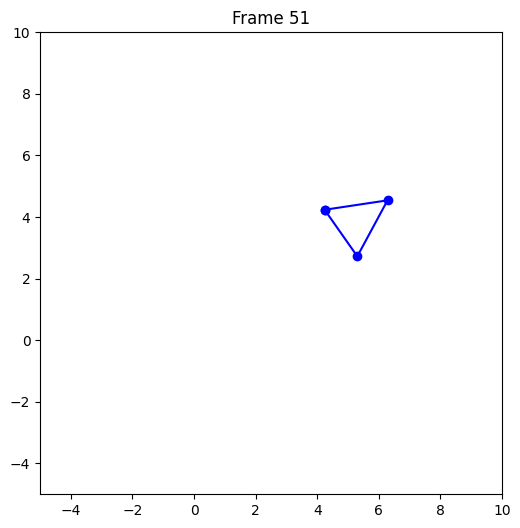

In [4]:
for frame in range(num_frames):
    angle = angles[frame]
    scale = scales[frame]
    tx = translations[frame]
    ty = translations[frame]

    # Compute transformation matrix
    matrix = get_transformation_matrix(scale, angle, tx, ty)

    # Convert shape to homogeneous coordinates
    ones = np.ones((1, original_shape.shape[1]))
    shape_homogeneous = np.vstack((original_shape, ones))

    # Apply transformation
    transformed_shape = matrix @ shape_homogeneous

    # Plot shape
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(transformed_shape[0], transformed_shape[1], 'bo-')
    ax.set_xlim(-5, 10)
    ax.set_ylim(-5, 10)
    ax.set_aspect('equal')
    ax.set_title(f"Frame {frame+1}")

    if frame % 10 == 0:
        print(f"Transformation matrix for frame {frame+1}:\n{matrix}")
        print(f"Ones vector for homogeneous coordinates:\n{ones}")
        print(
            f"Shape coordinates (homogeneous) for frame {frame+1}:\n{shape_homogeneous}")
        print(
            f"Transformed shape coordinates (homogeneous) for frame {frame+1}:\n{transformed_shape}")
        print('-' * 50)
        plt.show()

    plt.close(fig)